# **Student Performance Analysis**

## Importing libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("student-por.csv")
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


## Data Summary

In [ ]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

From above analysis we can clearly see that there is no missing value in our data.

## Co-relation matrix

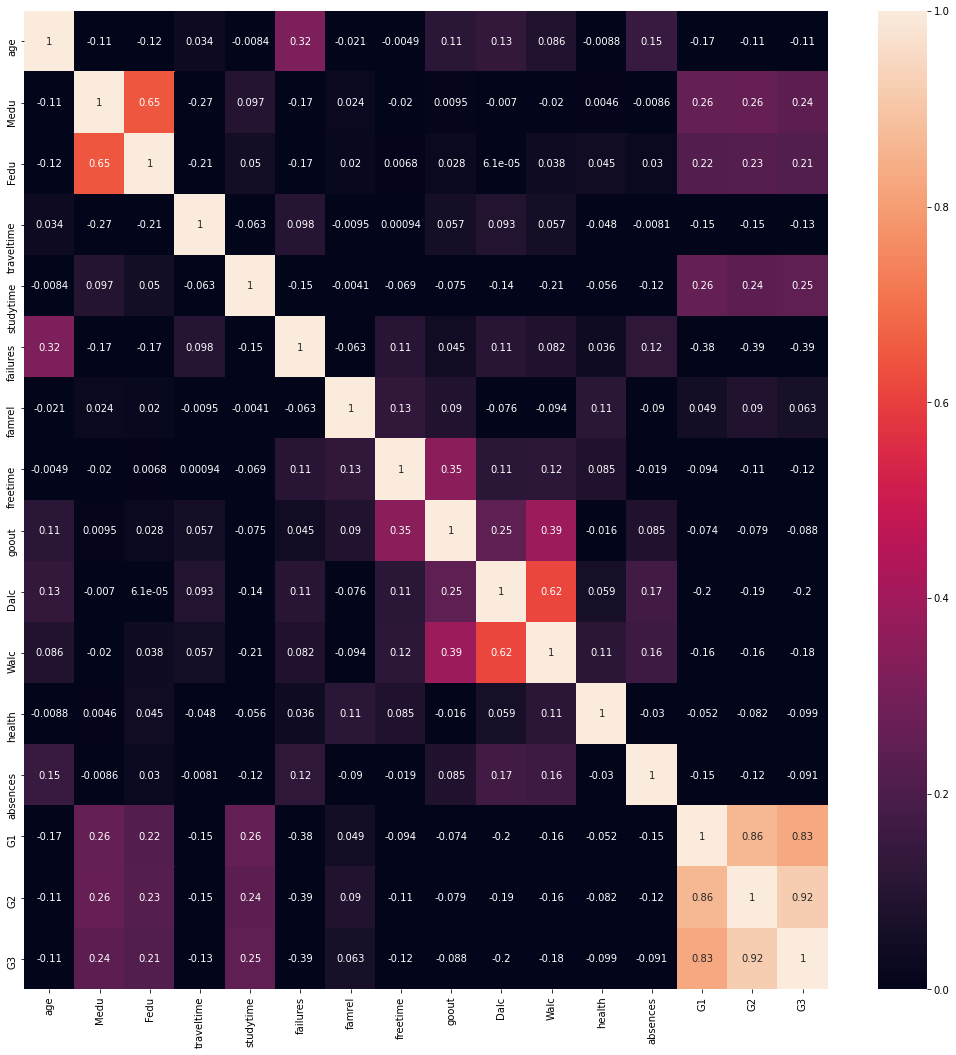

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True, vmin=0, vmax=1)

## Let's see our categorical variables

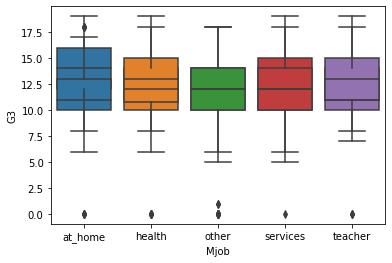

In [ ]:
sns.boxplot(x="Fjob",y="G3", data=dataset)
sns.boxplot(x="Mjob",y="G3", data=dataset)

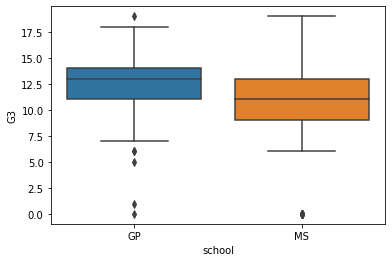

In [ ]:
sns.boxplot(x="school",y="G3", data=dataset)

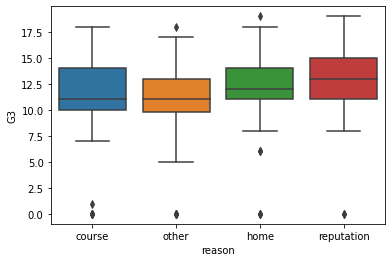

In [ ]:
sns.boxplot(x="reason",y="G3", data=dataset)

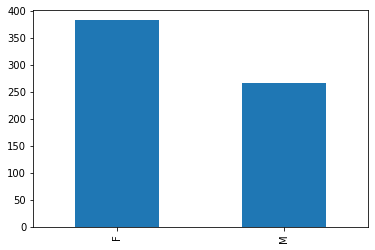

In [ ]:
dataset['sex'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f432bd53208>,
      dtype=object)

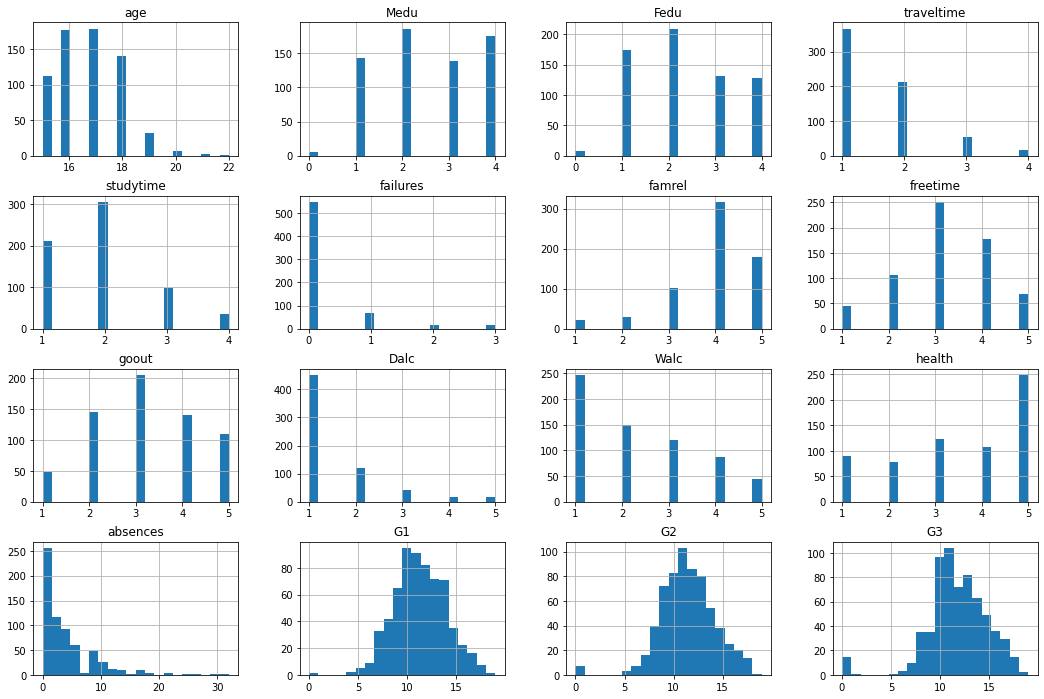

In [ ]:
dataset.hist(figsize=(18,12), bins=20)

## Focus on main feartures

In [ ]:
features = dataset[["studytime","failures","Dalc","Walc","traveltime","freetime",
            "Medu","Fedu","school","sex","address","Fjob","Mjob","reason",
            "schoolsup","guardian","higher","internet","G1","G2","G3"]]

In [ ]:
features.head()

,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,school,sex,address,Fjob,Mjob,reason,schoolsup,guardian,higher,internet,G1,G2,G3
0,2,0,1,1,2,3,4,4,GP,F,U,teacher,at_home,course,yes,mother,yes,no,0,11,11
1,2,0,1,1,1,3,1,1,GP,F,U,other,at_home,course,no,father,yes,yes,9,11,11
2,2,0,2,3,1,3,1,1,GP,F,U,other,at_home,other,yes,mother,yes,yes,12,13,12
3,3,0,1,1,1,2,4,2,GP,F,U,services,health,home,no,mother,yes,yes,14,14,14
4,2,0,1,2,1,3,3,3,GP,F,U,other,other,home,no,father,yes,no,11,13,13


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   studytime   649 non-null    int64 
 1   failures    649 non-null    int64 
 2   Dalc        649 non-null    int64 
 3   Walc        649 non-null    int64 
 4   traveltime  649 non-null    int64 
 5   freetime    649 non-null    int64 
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   school      649 non-null    object
 9   sex         649 non-null    object
 10  address     649 non-null    object
 11  Fjob        649 non-null    object
 12  Mjob        649 non-null    object
 13  reason      649 non-null    object
 14  schoolsup   649 non-null    object
 15  guardian    649 non-null    object
 16  higher      649 non-null    object
 17  internet    649 non-null    object
 18  G1          649 non-null    int64 
 19  G2          649 non-null    int64 
 20  G3        

## Converting categorical to numerical

In [ ]:

student = pd.get_dummies(features,columns=["school","sex","address","Fjob","Mjob","reason","schoolsup","guardian","higher","internet"])
student.head()

,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,schoolsup_no,schoolsup_yes,guardian_father,guardian_mother,guardian_other,higher_no,higher_yes,internet_no,internet_yes
0,2,0,1,1,2,3,4,4,0,11,11,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0
1,2,0,1,1,1,3,1,1,9,11,11,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
2,2,0,2,3,1,3,1,1,12,13,12,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1
3,3,0,1,1,1,2,4,2,14,14,14,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1
4,2,0,1,2,1,3,3,3,11,13,13,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
columns=["school","sex","address","Fjob","Mjob","reason","schoolsup","guardian","higher","internet"]
le = LabelEncoder()
for i in columns:
    features[i] = le.fit_transform(features[i])
features.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,school,sex,address,Fjob,Mjob,reason,schoolsup,guardian,higher,internet,G1,G2,G3
0,2,0,1,1,2,3,4,4,0,0,1,4,0,0,1,1,1,0,0,11,11
1,2,0,1,1,1,3,1,1,0,0,1,2,0,0,0,0,1,1,9,11,11
2,2,0,2,3,1,3,1,1,0,0,1,2,0,2,1,1,1,1,12,13,12
3,3,0,1,1,1,2,4,2,0,0,1,3,1,1,0,1,1,1,14,14,14
4,2,0,1,2,1,3,3,3,0,0,1,2,2,1,0,0,1,0,11,13,13


## Locating dependent and independent variables

In [ ]:
X = features.drop("G3", axis=1)
y = features["G3"]

In [ ]:
X.head()

,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,school,sex,address,Fjob,Mjob,reason,schoolsup,guardian,higher,internet,G1,G2
0,2,0,1,1,2,3,4,4,0,0,1,4,0,0,1,1,1,0,0,11
1,2,0,1,1,1,3,1,1,0,0,1,2,0,0,0,0,1,1,9,11
2,2,0,2,3,1,3,1,1,0,0,1,2,0,2,1,1,1,1,12,13
3,3,0,1,1,1,2,4,2,0,0,1,3,1,1,0,1,1,1,14,14
4,2,0,1,2,1,3,3,3,0,0,1,2,2,1,0,0,1,0,11,13


In [ ]:
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

## Converting features into one standard unit

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X[:3]

array([[ 0.08365295, -0.37430512, -0.54355533, -0.99769466,  0.57671799,
        -0.17164654,  1.31021563,  1.54071544, -0.73094388, -0.83337685,
         0.66018233,  2.05724782, -1.55645254, -0.93397405,  2.92303227,
         0.33264751,  0.34491378, -1.81604329, -4.15547029, -0.19581961],
       [ 0.08365295, -0.37430512, -0.54355533, -0.99769466, -0.76003192,
        -0.17164654, -1.33603938, -1.18883229, -0.73094388, -0.83337685,
         0.66018233, -0.26072759, -1.55645254, -0.93397405, -0.34211049,
        -1.59492599,  0.34491378,  0.55064767, -0.87456978, -0.19581961],
       [ 0.08365295, -0.37430512,  0.53855329,  0.56067799, -0.76003192,
        -0.17164654, -1.33603938, -1.18883229, -0.73094388, -0.83337685,
         0.66018233, -0.26072759, -1.55645254,  0.74510949,  2.92303227,
         0.33264751,  0.34491378,  0.55064767,  0.21906372,  0.49113675]])

## Splitting the data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [ ]:
print('X_train: ', X_train.shape, 'y_train: ',y_train.shape)
print('X_test: ', X_test.shape, 'y_test: ',y_test.shape)

X_train:  (454, 20) y_train:  (454,)
X_test:  (195, 20) y_test:  (195,)


# Applying Regression models

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict_linear = linear_reg.predict(X_test)

### Coefficients and intercept

In [ ]:
print('Coefficients: ', linear_reg.coef_)
print('The Intercept: ', linear_reg.intercept_)

Coefficients:  [ 7.48168259e-03 -1.64307590e-01 -1.02652904e-01  4.59941730e-02
  1.57142592e-01 -2.59978417e-02 -1.68526972e-02 -2.50813637e-04
 -5.97479226e-02 -1.41832440e-01  8.73284428e-02 -6.53066927e-02
  6.25242085e-02 -7.77668827e-02 -7.15391988e-03  6.59612836e-02
 -2.34502868e-02  5.59800779e-02  3.33946544e-01  2.54512740e+00]
The Intercept:  11.957315785360812


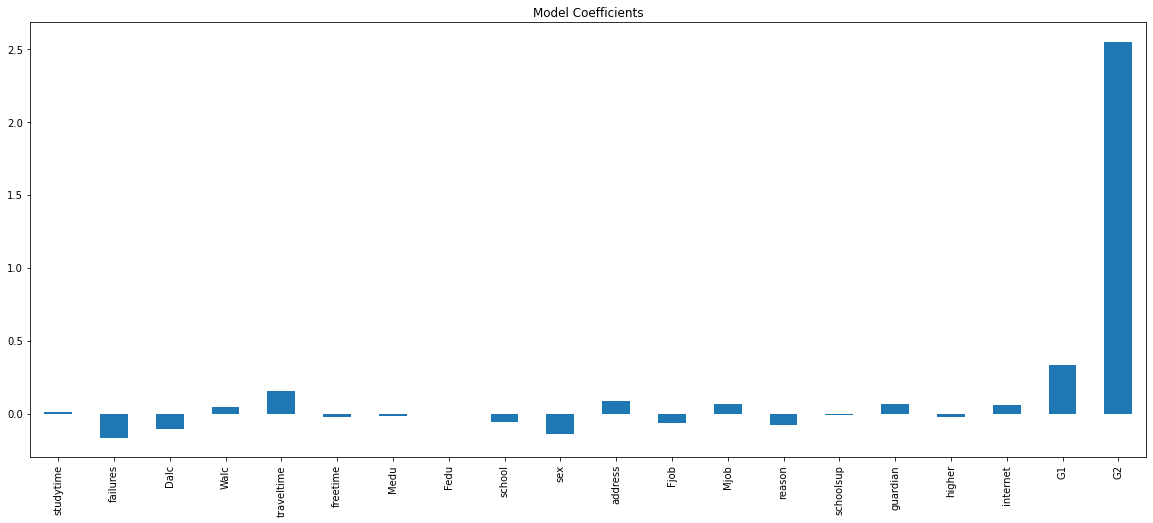

In [ ]:
x_train = features.drop("G3",axis=1)
predictors = x_train.columns

coef = pd.Series(linear_reg.coef_,predictors)
plt.figure(figsize=(20,8))
coef.plot(kind='bar', title='Model Coefficients')

### Accuracy

In [ ]:
from sklearn.metrics import r2_score
print('Mean absolute error: ' ,np.mean(np.absolute(y_predict_linear - y_test)) )
print('Residual sum of squares(MSE):', np.mean((y_predict_linear - y_test)**2))
print('R_2 score:' ,r2_score(y_predict_linear, y_test))

Mean absolute error:  0.8823480932426813
Residual sum of squares(MSE): 2.232372577216215
R_2 score: 0.7545139839130521


## KNN regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Looking for best 'K' value (Hyperparameter tuning)

In [ ]:
rmse_val = []

for K in range(20):
     K+=1
     knn_model = KNeighborsRegressor(n_neighbors = K)       
     knn_model.fit(X_train, y_train)                        # fit the model

     y_predict_knn = knn_model.predict(X_test)              # make predictions on test set
     error = mean_squared_error(y_test, y_predict_knn)      # calculate rmse value
     rmse_val.append(error)                                 # store rmse value to rmse_val list
     print("RMSE value for K = ", K, "is ", error)
 

RMSE value for K =  1 is  7.682051282051282
RMSE value for K =  2 is  6.269230769230769
RMSE value for K =  3 is  5.784045584045585
RMSE value for K =  4 is  4.747115384615385
RMSE value for K =  5 is  4.881435897435899
RMSE value for K =  6 is  4.924928774928775
RMSE value for K =  7 is  4.9456828885400315
RMSE value for K =  8 is  4.875721153846154
RMSE value for K =  9 is  4.859639126305793
RMSE value for K =  10 is  4.877487179487179
RMSE value for K =  11 is  4.917652044924773
RMSE value for K =  12 is  4.9735398860398865
RMSE value for K =  13 is  4.908966772872098
RMSE value for K =  14 is  4.90279958137101
RMSE value for K =  15 is  4.936341880341881
RMSE value for K =  16 is  4.9779046474358974
RMSE value for K =  17 is  5.007097861769141
RMSE value for K =  18 is  5.077255460588794
RMSE value for K =  19 is  5.094537964344059
RMSE value for K =  20 is  5.163576923076923


### plotting the rmse values against k values

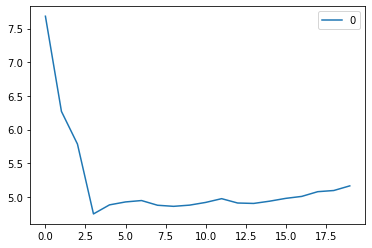

In [ ]:
curve = pd.DataFrame(rmse_val)
curve.plot()

### GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_neighbors' : [i for i in range(2,10,1)]}

knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 8}

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm_reg = SVR(kernel = 'rbf')
svm_reg.fit(X_train, y_train)
y_predict_svm = svm_reg.predict(X_test)

In [ ]:
data = {'y_test' : y_test, 'y_predict' : y_predict_svm.round(2)}
df = pd.DataFrame(data)
df

,y_test,y_predict
462,14,13.66
267,15,14.98
425,10,10.26
594,18,16.60
307,14,11.15
...,...,...
55,12,13.66
337,18,17.28
231,10,10.61
98,13,13.23


In [ ]:
r2_score(y_test,y_predict_svm)

0.6843722458299404

## Ridge and Lasso Regression

In [ ]:
from sklearn import linear_model

In [ ]:
def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            r2_test.append(r2_score(y_test, models[i].fit(X_train, y_train).predict(X_test)))
            r2_train.append(r2_score(y_train, models[i].fit(X_train,y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results,index=["Train","Test"])

In [ ]:
models = {'Linear': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}

In [ ]:
test(models, features)

,Linear,Lasso,Ridge
Train,0.872664,0.753374,0.872653
Test,0.817302,0.693513,0.817315


### Hyper parameter tuning (alpha)

In [ ]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

In [ ]:
models2 = {'Linear': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(),param_grid=lasso_params).fit(X_train,y_train).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), param_grid=ridge_params).fit(X_train,y_train).best_estimator_,}

In [ ]:
test(models2, features)

,Linear,Lasso,Ridge
Train,0.872664,0.871289,0.818697
Test,0.817302,0.818425,0.760312


## Decision Trees Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_dt = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_dt})
df

,Real Values,Predicted Values
462,14,15.0
267,15,15.0
425,10,9.0
594,18,17.0
307,14,12.0
...,...,...
55,12,14.0
337,18,18.0
231,10,10.0
98,13,14.0


In [ ]:
r2_score(y_pred_dt,y_test)

0.6615137045928192

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [ ]:
# Number of trees in random forest
n_estimators = [x for x in range(50,501,20)]
# Maximum number of levels in tree
max_depth = [x for x in range(2,21,2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,
                  70,
                  90,
                  110,
                  130,
                  150,
                  170,
                  190,
                  210,
                  230,
                  250,
                  270,
                  290,
                  310,
                  330,
                  350,
                  370,
                  390,
                  410,
                  430,
                  450,
                  470,
                  490]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions= random_grid, cv = 3, verbose=2)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_depth=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_depth=12, total=   0.9s
[CV] n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_depth=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_depth=12, total=   0.8s
[CV] n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_depth=12 
[CV]  n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_depth=12, total=   0.9s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=6 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=6, total=   0.5s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=6 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=6, total=   0.5s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=6 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=6, total=   0.5s
[CV] n_estimators=470, min_samples_split=10, min_samples_leaf=2, max_depth=6 
[CV]  n_estimators=470, min_samples_split=10, min_samples_leaf=2, max_depth=6, total=   0.8s
[CV] n_estimators=470, min_samples_split=10, min_samples_l

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   18.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 290}

### Accuracy

### Accuracy of normal random forest model

In [ ]:
def evaluate(model, features, labels):
    predictions = model.predict(features)
    print('Model Performance')
    print('Accuracy = {}'.format(r2_score(predictions, labels)))

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy = 0.7551431174102858


### Accuracy of model with best parameters

In [ ]:
best_random = rf_random.best_estimator_
best_random

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Accuracy = 0.7521304050207679
